#**Projet-1: Analyse du marché des jeux vidéo** 🎮
### 🎯 **Contexte & question business**
- Dataset : 10 000 jeux (titres, dates, notes, recommandations, plateformes, genres, éditeurs, description).  
- Question : **quels genres/plateformes performent le mieux en engagement ?**  
- KPI's : **rating** (note moyenne) & **suggestions** (reco communauté).

### 🧩 **Variables principales**
- id: Identifiant unique
- name: Titre du jeu
- released: Date de sortie
- updated: Dernière mise à jour
- rating: Note moyenne des joueurs
- suggestions_count: Nombre de recommandations
- platforms: Plateformes disponibles (PC, PlayStation, Xbox, Switch, Mobile…)
- genres: Genre(s) du jeu (RPG, Action, Adventure, Indie…)
- developers: Studio(s) de développement
- publishers: Éditeur(s)
- description: Résumé du jeu
- image: Vignette de couverture

### 🔍 **Points clés des données**
10 003 entrées et 13 colonnes.
| Variables Numériques  | Variables catégorielles | Variables temporelles | Variables textuelles |
| ------------- | ------------- | ------------- | ------------- |
| rating  | genres |realased|name|
| suggestions_count | plateforms |updated|description|
||developers|||
||publishers|||

--> Certaines valeurs manquantes, notamment dans **released** pour des jeux encore non sortis.


### ⚙️ **Imports et Setup**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


### ⚡**Ouverture et Exploration du Dataset**

In [ ]:
df=pd.read_csv("final.csv")
df.head()

,Unnamed: 0,id,name,released,updated,rating,suggestions_count,platforms,developers,genres,publishers,image,description
0,0,428090,Hazumi and the Pregnation,20-02-2020,2025-06-12T15:08:44,5.00,300,PC,Mihiraghi,"RPG, Indie",Mihiraghi,https://media.rawg.io/media/screenshots/bcd/bc...,Mature Content Description\nAll characters dep...
1,1,58781,The Elder Scrolls VI,NaN,2024-04-12T10:28:14,4.86,45,"PC, Xbox Series S/X",Bethesda Game Studios,"Action, RPG",Bethesda Softworks,https://media.rawg.io/media/games/b40/b40eba32...,Currently in pre-production at Bethesda Game S...
2,2,964507,Geometry Dash RazorLeaf,19-07-2023,2025-07-16T18:31:29,4.83,27,"Android, PC",NaN,"Arcade, Casual, Indie",NaN,https://media.rawg.io/media/screenshots/8ad/8a...,NaN
3,3,830060,Sonic Triple Trouble 16-Bit (NoahNCopeland),02-08-2022,2025-02-13T23:27:58,4.83,211,PC,NaN,"Action, Adventure, Indie, Platformer",NaN,https://media.rawg.io/media/screenshots/a9c/a9...,What if Sonic Triple Trouble had been original...
4,4,484878,ATRI -My Dear Moments,18-06-2020,2025-07-09T10:55:10,4.83,385,PC,"Frontwing, 枕","Adventure, Casual",ANIPLEX.EXE,https://media.rawg.io/media/screenshots/ed0/ed...,INTRODUCTION\nA new visual novel game co-produ...


In [ ]:
print("shape du df:",df.shape)

shape du df: (10003, 13)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10003 entries, 0 to 10002
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10003 non-null  int64  
 1   id                 10003 non-null  int64  
 2   name               10003 non-null  object 
 3   released           9826 non-null   object 
 4   updated            10003 non-null  object 
 5   rating             10003 non-null  float64
 6   suggestions_count  10003 non-null  int64  
 7   platforms          9990 non-null   object 
 8   developers         9701 non-null   object 
 9   genres             9599 non-null   object 
 10  publishers         9448 non-null   object 
 11  image              9961 non-null   object 
 12  description        9039 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 1016.1+ KB


###🧹**Nettoyage du Dataset**







In [ ]:
#suppression des colonne "inutiles"
df = df.drop(columns=["Unnamed: 0","image","description"], errors="ignore")
df.head(2)

,id,name,released,updated,rating,suggestions_count,platforms,developers,genres,publishers
0,428090,Hazumi and the Pregnation,20-02-2020,2025-06-12T15:08:44,5.00,300,PC,Mihiraghi,"RPG, Indie",Mihiraghi
1,58781,The Elder Scrolls VI,NaN,2024-04-12T10:28:14,4.86,45,"PC, Xbox Series S/X",Bethesda Game Studios,"Action, RPG",Bethesda Softworks


In [ ]:
#conversion des colonne en date
df["released"] = pd.to_datetime(df["released"], errors="coerce")
df["updated"] = pd.to_datetime(df["updated"], errors="coerce")
df["released"] = df["released"].dt.date
df["updated"] = df["updated"].dt.date
df.head()

/tmp/ipython-input-1964073534.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["released"] = pd.to_datetime(df["released"], errors="coerce")


,id,name,released,updated,rating,suggestions_count,platforms,developers,genres,publishers
0,428090,Hazumi and the Pregnation,2020-02-20,2025-06-12,5.00,300,PC,Mihiraghi,"RPG, Indie",Mihiraghi
1,58781,The Elder Scrolls VI,NaT,2024-04-12,4.86,45,"PC, Xbox Series S/X",Bethesda Game Studios,"Action, RPG",Bethesda Softworks
2,964507,Geometry Dash RazorLeaf,2023-07-19,2025-07-16,4.83,27,"Android, PC",NaN,"Arcade, Casual, Indie",NaN
3,830060,Sonic Triple Trouble 16-Bit (NoahNCopeland),2022-08-02,2025-02-13,4.83,211,PC,NaN,"Action, Adventure, Indie, Platformer",NaN
4,484878,ATRI -My Dear Moments,2020-06-18,2025-07-09,4.83,385,PC,"Frontwing, 枕","Adventure, Casual",ANIPLEX.EXE


In [ ]:
#Verfier les valeur unique pour mieux les regrouper par plateforme
print(f"Unique Values ({df['platforms'].nunique()}):")
print(df['platforms'].unique())

Unique Values (2765):
['PC' 'PC, Xbox Series S/X' 'Android, PC' ...
 'Nintendo 3DS, PC, macOS, iOS'
 'PlayStation 5, PC, Xbox One, Nintendo Switch, Xbox Series S/X, PlayStation 4, Linux'
 'PlayStation 4, PlayStation 5, PC, Xbox One, Xbox Series S/X']


In [ ]:
# Valeurs manquantes
print(df.isna().sum())


id                     0
name                   0
released             177
updated                0
rating                 0
suggestions_count      0
platforms             13
developers           302
genres               404
publishers           555
dtype: int64


### 📲 Analyses EDA

In [ ]:
all_genres = df["genres"].dropna().str.split(",").sum() # concat toutes les listes et séparer les genres car certains en ont plusieurs
counts = Counter([g.strip() for g in all_genres])
genre=counts.most_common()
print(genre)

[('Action', 4282), ('Adventure', 3343), ('Indie', 2529), ('RPG', 1974), ('Strategy', 1503), ('Simulation', 1258), ('Casual', 1216), ('Arcade', 965), ('Shooter', 881), ('Puzzle', 702), ('Platformer', 700), ('Racing', 501), ('Sports', 473), ('Fighting', 353), ('Family', 158), ('Massively Multiplayer', 136), ('Card', 83), ('Board Games', 69), ('Educational', 65)]


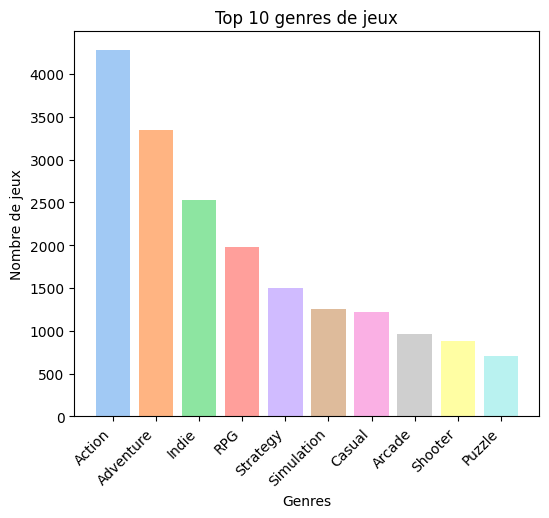

In [ ]:
#top 10 genres les plus fréquents
genres, counts = zip(*genre[:10])
colors = sns.color_palette("pastel", len(genres))
plt.figure(figsize=(6, 5))
plt.bar(genres, counts, color=colors)
plt.xlabel("Genres")
plt.ylabel("Nombre de jeux")
plt.title("Top 10 genres de jeux")
plt.xticks(rotation=45, ha='right') #Etiquette de travers
plt.show()


####***Genres***  
Les genres dominants sont l’Action, l’Aventure et les RPG, les jeux de Simulation et de Sport.  
Les genres plus niche comme Puzzle ou Casual sont moins représentés.


In [ ]:
all_plat = df["platforms"].dropna().str.split(",").sum()  # concatène toutes les listes
counts = Counter([g.strip() for g in all_plat])
top10_plat=counts.most_common(10)
print(top10_plat)

[('PC', 7258), ('macOS', 2063), ('PlayStation 4', 2033), ('Xbox One', 1768), ('Nintendo Switch', 1662), ('iOS', 1491), ('Linux', 1258), ('Android', 1167), ('PlayStation 3', 1044), ('Xbox 360', 927)]


In [ ]:
all_genres = df["genres"].dropna().str.split(",").sum()  # concat toutes les listes
counts = Counter([g.strip() for g in all_genres])
total = sum(counts.values())

# Ajouter les %
genre = [(g,c,f"{round(c/total*100, 2)}%") for g, c in counts.most_common()]
print(genre)

[('Action', 4282, '20.21%'), ('Adventure', 3343, '15.78%'), ('Indie', 2529, '11.93%'), ('RPG', 1974, '9.32%'), ('Strategy', 1503, '7.09%'), ('Simulation', 1258, '5.94%'), ('Casual', 1216, '5.74%'), ('Arcade', 965, '4.55%'), ('Shooter', 881, '4.16%'), ('Puzzle', 702, '3.31%'), ('Platformer', 700, '3.3%'), ('Racing', 501, '2.36%'), ('Sports', 473, '2.23%'), ('Fighting', 353, '1.67%'), ('Family', 158, '0.75%'), ('Massively Multiplayer', 136, '0.64%'), ('Card', 83, '0.39%'), ('Board Games', 69, '0.33%'), ('Educational', 65, '0.31%')]


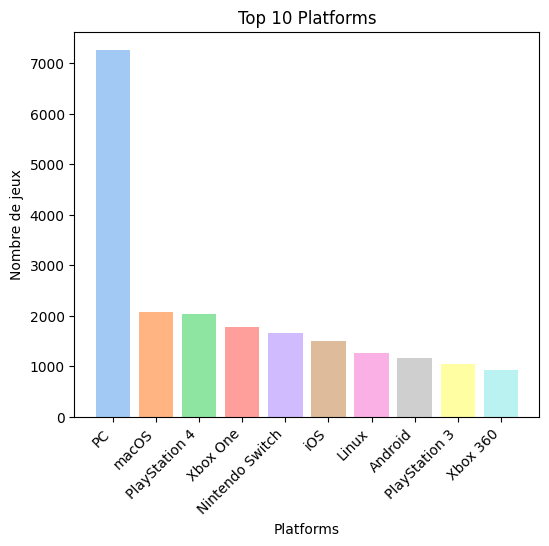

In [ ]:
#top 10 graphique plateforme
colors = sns.color_palette("pastel", len(top10_plat))
plt.figure(figsize=(6, 5))
platforms, counts = zip(*top10_plat)
plt.bar(platforms, counts, color=colors)
plt.xlabel("Platforms")
plt.ylabel("Nombre de jeux")
plt.title("Top 10 Platforms")
plt.xticks(rotation=45, ha='right') #Etiquette de travers
plt.show()

In [ ]:
def group_platform(p):
    if not isinstance(p, str) or pd.isna(p):
        return "Autre"

    p = p.lower()
    if any(word in p for word in ["pc", "mac", "linux", "windows"]):
        return "PC"
    if "ps" in p or "playstation" in p:
        return "PlayStation"
    if "xbox" in p:
        return "Xbox"
    if any(word in p for word in ["nintendo", "switch", "wii", "3ds", "ds"]):
        return "Nintendo"
    if "ios" in p or "android" in p:
        return "Mobile"
    return "Autre"

# Appliquer la fct après explode au cas ou le jeux est sur plusieeur plateforme
df_exploded_platforms = df.assign(platforms=df["platforms"].str.split(",")) \
                          .explode("platforms")
df_exploded_platforms["platforms"] = df_exploded_platforms["platforms"].str.strip()
df_exploded_platforms["platform_group"] = df_exploded_platforms["platforms"].apply(group_platform)

# Top plateformes regroupées
Top_plat=df_exploded_platforms["platform_group"].value_counts()
print(Top_plat)

platform_group
PC             10745
PlayStation     5337
Xbox            3466
Nintendo        3205
Autre           2881
Mobile          2658
Name: count, dtype: int64


In [ ]:

#Verifier le explode et le contenus des groupes
Autre_platforms_df = df_exploded_platforms[df_exploded_platforms["platform_group"] == "Autre"]
PC_platforms_df = df_exploded_platforms[df_exploded_platforms["platform_group"] == "PC"]
PS_platforms_df = df_exploded_platforms[df_exploded_platforms["platform_group"] == "PlayStation"]
Xbox_platforms_df = df_exploded_platforms[df_exploded_platforms["platform_group"] == "Xbox"]
Nintendo_platforms_df = df_exploded_platforms[df_exploded_platforms["platform_group"] == "Nintendo"]
Mobile_platforms_df = df_exploded_platforms[df_exploded_platforms["platform_group"] == "Mobile"]

print(Autre_platforms_df["platforms"].unique())
print(PC_platforms_df["platforms"].unique())
print(PS_platforms_df["platforms"].unique())
print(Xbox_platforms_df["platforms"].unique())
print(Nintendo_platforms_df["platforms"].unique())
print(Mobile_platforms_df["platforms"].unique())

['NES' 'Game Boy Advance' 'Web' 'Dreamcast' 'SEGA Saturn'
 'Commodore / Amiga' 'Game Boy' 'Atari ST' 'Genesis' 'SNES' '3DO'
 'SEGA 32X' 'GameCube' nan 'Game Boy Color' 'Apple II'
 'SEGA Master System' 'Jaguar' 'Atari 8-bit' 'Atari 2600' 'Game Gear'
 'SEGA CD' 'Atari Flashback' 'Neo Geo' 'Atari XEGS' 'Atari 7800'
 'Atari Lynx' 'Atari 5200']
['PC' 'macOS' 'Linux' 'Classic Macintosh']
['PlayStation 4' 'PlayStation 5' 'PlayStation 3' 'PlayStation 2'
 'PlayStation' 'PSP' 'PS Vita']
['Xbox Series S/X' 'Xbox One' 'Xbox 360' 'Xbox']
['Nintendo Switch' 'Wii U' 'Wii' 'Nintendo DS' 'Nintendo 3DS'
 'Nintendo 64' 'Nintendo DSi']
['Android' 'iOS']


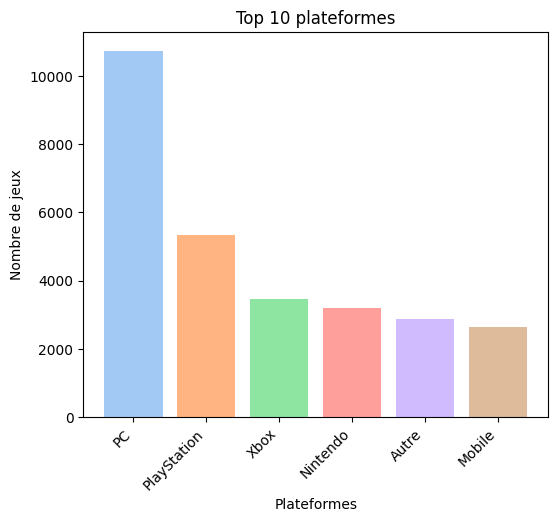

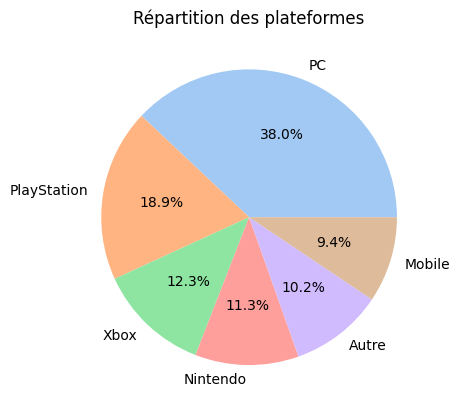

In [ ]:
#Nouvelle répartition des plateformes
plt.figure(figsize=(6, 5))
plt.bar(Top_plat.index, Top_plat.values, color=colors)
plt.xlabel("Plateformes")
plt.ylabel("Nombre de jeux")
plt.title("Top 10 plateformes")
plt.xticks(rotation=45, ha='right')
plt.show()

plt.pie(Top_plat.values, labels=Top_plat.index, autopct='%1.1f%%', colors = colors)
plt.title("Répartition des plateformes")
plt.show()

device_type
Console    14799
PC         10745
Mobile      2658
Autre         90
Name: count, dtype: int64


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

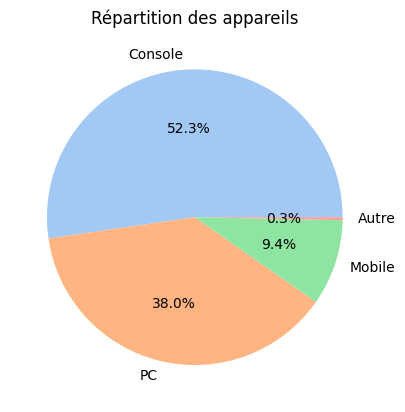

In [ ]:
#meme méthode mais par type d'appareil
def group_device_type(p):
    if not isinstance(p, str) or pd.isna(p):
        return "Autre"

    p = p.lower()
    # PC
    if any(word in p for word in ["pc", "mac", "linux", "windows"]):
        return "PC"
    # Mobile
    if "ios" in p or "android" in p:
        return "Mobile"
    # Consoles (modernes + rétro)
    if any(word in p for word in [
        "playstation", "ps", "xbox", "nintendo", "switch", "wii", "3ds", "ds",
        "nes", "snes", "game boy", "gamecube", "dreamcast", "saturn", "genesis",
        "sega", "3do", "neo geo", "jaguar", "atari", "commodore", "amiga", "apple ii",
        "web"
    ]):
        return "Console"
    return "Autre"

# Application
df_exploded_platforms["device_type"] = df_exploded_platforms["platforms"].apply(group_device_type)

# Résumé des catégories
print(df_exploded_platforms["device_type"].value_counts())

plt.pie(df_exploded_platforms["device_type"].value_counts(), labels=df_exploded_platforms["device_type"].value_counts().index, autopct='%1.1f%%', colors = colors)
plt.title("Répartition des appareils")
plt


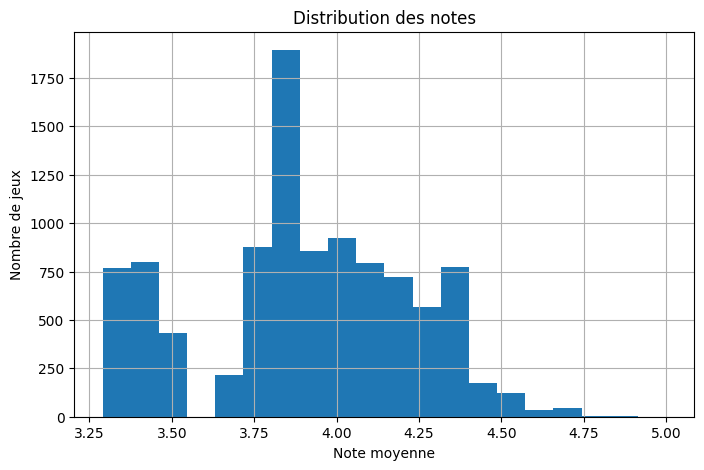

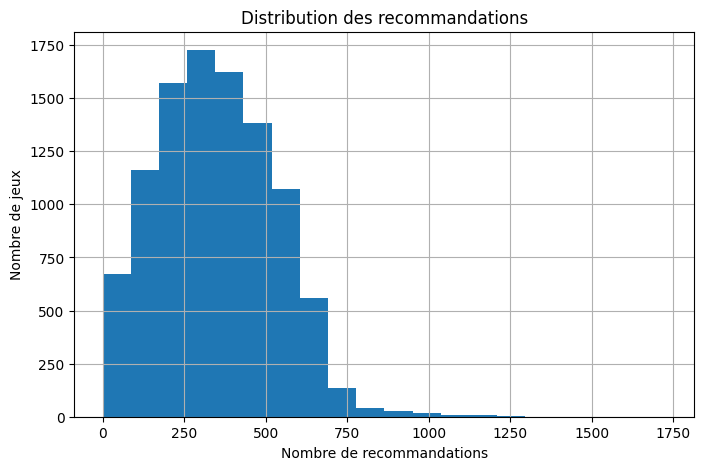

In [ ]:
df['rating'].hist(bins=20, figsize=(8,5))
plt.xlabel('Note moyenne')
plt.ylabel('Nombre de jeux')
plt.title('Distribution des notes')
plt.show()

df["suggestions_count"].hist(bins=20, figsize=(8,5))
plt.xlabel('Nombre de recommandations')
plt.ylabel('Nombre de jeux')
plt.title('Distribution des recommandations')
plt.show()

### **📲 Analyses EDA Interprétations**

👉 Les joueurs aiment surtout des expériences immersives et narratives avec des genre comme l’Action, l’Aventure et les RPG.

👉 Pour un éditeur, lancer un jeu Action/Adventure maximise la visibilité mais implique aussi une concurrence très forte.  

👉 Le marché PC/Console domine en volume d’offres = explosions des ventes digitales ? (Steam, PSN, Xbox Live)  

👉 Les mobiles, bien que minoritaires dans ce dataset, représentent un marché colossal (Genshin, LADS) en termes de revenus (F2P, microtransactions).  





### ⚡ Insights

In [ ]:
#Calculer la moyenne des ratings par genre et calculer la moyenne des suggestions par genre
df_exploded = df.explode("genres")
genre_rating = df_exploded.groupby("genres")["rating"].mean().round(2)
genre_suggestions = df_exploded.groupby("genres")["suggestions_count"].mean().round(1)


# Comparer suggestions vs médiane
median_suggestions = df["suggestions_count"].median()
genre_suggestions_vs_median = ((genre_suggestions / median_suggestions - 1) * 100).round(1)


genre_summary = pd.DataFrame({
    "Rating moyen": genre_rating,
    "Suggestions moyennes": genre_suggestions,
    "Écart vs médiane (%)": genre_suggestions_vs_median
})
genre_summary = genre_summary.sort_values(by="Rating moyen", ascending=False)

# Afficher top 10
display(genre_summary.head(10))


,Rating moyen,Suggestions moyennes,Écart vs médiane (%)
genres,,,
"Shooter, Puzzle",4.59,565.0,66.7
"Action, Arcade, Educational",4.56,439.0,29.5
"Adventure, RPG, Puzzle",4.55,398.0,17.4
"Educational, Family",4.50,182.0,-46.3
"Action, RPG, Strategy, Simulation, Sports, Casual",4.44,413.0,21.8
"Action, Simulation, Arcade, Massively Multiplayer, Indie",4.43,361.0,6.5
"Adventure, Educational",4.42,256.0,-24.5
"Strategy, Simulation, Sports, Board Games, Casual, Indie, Puzzle",4.40,111.0,-67.3
"Action, Fighting, Puzzle, Platformer",4.40,255.0,-24.8


In [ ]:
df_exploded = df.assign(genres=df["genres"].dropna().str.split(","))
df_exploded = df_exploded.explode("genres")

df_exploded["genres"] = df_exploded["genres"].str.strip()
genre_rating = df_exploded.groupby("genres")["rating"].mean().round(2).sort_values(ascending=False)

print(genre_rating)


genres
Educational              3.95
Platformer               3.95
RPG                      3.92
Racing                   3.92
Fighting                 3.92
Puzzle                   3.91
Arcade                   3.90
Shooter                  3.89
Action                   3.88
Adventure                3.88
Strategy                 3.88
Board Games              3.86
Family                   3.86
Card                     3.85
Casual                   3.85
Simulation               3.85
Massively Multiplayer    3.84
Sports                   3.83
Indie                    3.81
Name: rating, dtype: float64


In [ ]:
#multi vs exclusif
platform_counts = df_exploded_platforms.groupby("id")["platform_group"].nunique()
df_multi = df.merge(platform_counts.rename("platform_count"), left_on="id", right_index=True)
df_multi["type"] = df_multi["platform_count"].apply(lambda x: "Multi-plateforme" if x > 1 else "Exclusif")

# Moyenne des suggestions
print(df_multi.groupby("type")["suggestions_count"].mean())

avg_suggestions = df_multi.groupby("type")["suggestions_count"].mean()
multi = avg_suggestions["Multi-plateforme"]
exclu = avg_suggestions["Exclusif"]
multiplicateur = multi / exclu
print("Les Multi sont recommandé ",multiplicateur.round(2)," fois plus que les exclusifs")

type
Exclusif            319.429222
Multi-plateforme    377.064216
Name: suggestions_count, dtype: float64
Les Multi sont recommandé  1.18  fois plus que les exclusifs


In [ ]:
rating_by_publisher = df.groupby("publishers")["rating"].mean().sort_values(ascending=False)
print(rating_by_publisher.head(10))

publishers
Mihiraghi                                                                         5.00
ANIPLEX.EXE                                                                       4.83
505 Games, Atlus                                                                  4.83
CD PROJEKT RED, cdp.pl                                                            4.76
lowiro                                                                            4.71
Psychose Interactive, Pie Games                                                   4.71
Apus Software                                                                     4.71
IndieGala                                                                         4.71
Nozori Games                                                                      4.71
Ubisoft Entertainment, Microsoft Studios, Crave Entertainment, '''Dreamcast'''    4.71
Name: rating, dtype: float64


In [ ]:
#on trie les editeurs avc au moins 100 jeux de sorti
publisher_stats = (
    df.groupby("publishers")
    .agg(nb_jeux=("id", "count"), avg_rating=("rating", "mean"))
    .query("nb_jeux >= 100")
    .sort_values("avg_rating", ascending=False)
    .round(2)
)
print(publisher_stats.head(10))

                             nb_jeux  avg_rating
publishers                                      
Nintendo                         442        4.07
Konami                           181        4.00
Capcom                           204        3.99
Microsoft Studios                103        3.98
Sony Computer Entertainment      117        3.98
SEGA                             263        3.94
Electronic Arts                  367        3.93
Activision Blizzard              113        3.92
Square Enix                      155        3.92
Ubisoft Entertainment            221        3.85


Corrélation rating  log(1+suggestions) : -0.06


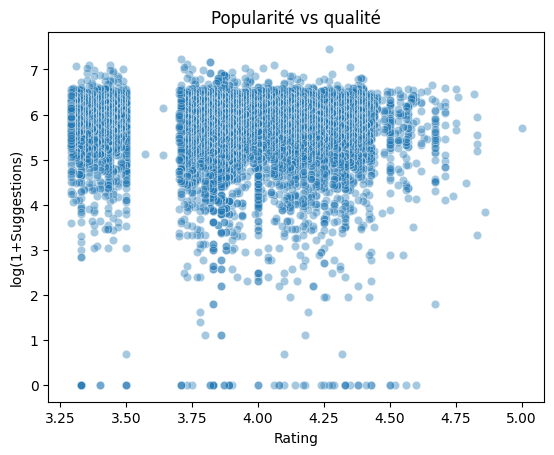

In [ ]:
# Corrélation (avec log pour suggestions)
corr = np.corrcoef(df["rating"].fillna(0), np.log1p(df["suggestions_count"].fillna(0)))[0,1]
print(f"Corrélation rating  log(1+suggestions) : {corr:.2f}")

# Scatter
sns.scatterplot(data=df, x="rating", y=np.log1p(df["suggestions_count"]), alpha=0.4)
plt.xlabel("Rating"); plt.ylabel("log(1+Suggestions)"); plt.title("Popularité vs qualité")
plt.show()

### **📲 Analyses Insights**

👉 Les genres Action/RPG/Shooter combinés à du Puzzle/Arcade créent à la fois de la qualité critique et de l’engagement.

👉 Le multi-plateforme multiplie l’engagement (≈2× plus de recommendations)

👉 Le marché est fragmenté mais reste dominé par Nintendo, EA etc... Les éditeurs majeurs ont la capacité d’imposer des genres, des licences et des tendances. Les petits éditeurs (moins de 100 jeux) sont mieux notés mais peu mis avant.

👉 Les licences fortes (FIFA, Zelda, CoD) continuent de dominer le nombre de recommandations mais pas forcément les meilleures notes.

👉 Corrélation entre note et reco : plus un jeu est bien noté, moins il tend à être recommandé et inversement.

### 🔔**Conclusion et Actions**

L’analyse met en évidence que les genres Action, RPG et Adventure doivent rester une priorité pour tout éditeur souhaitant maximiser sa visibilité.

 Une stratégie de déploiement cross-platform apparaît donc essentielle pour accroître l’engagement. Malgré quelques exceptions (Nintendo c'est à vous qu'on parle 😉)

La qualité seule ne garantit pas le succès commercial (on le voit grace aux peu de jeux etremement bien noté mais peu recomandé). Le marketing, la puissance de la communauté et la capacité à générer de la hype jouent un rôle déterminant dans la performance d’un jeu.

###🎯 **Recommandations**

🔼 Favoriser le multi-plateforme pour maximiser l’engagement.

🔼 Maintenir un portefeuille équilibré : blockbuster grand public (Action/RPG/Adventure) + niches différenciantes (Simulation, Éducatif).

🔼 Capitaliser sur les licences existantes et sur la force des communautés pour générer du bouche-à-oreille.

🔼Allouer des ressources équivalentes au marketing et au développement, un bon jeu a besoin d’une communication solide pour percer.